In [1]:
!pip install -q node2vec==0.4.6

In [2]:
!pip install -qI gensim==4.3.0

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.26.3 which is incompatible.


C:\Users\admin\anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:433: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


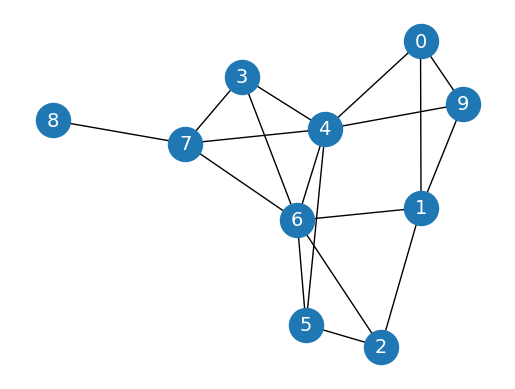

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

# Create graph
G = nx.erdos_renyi_graph(10, 0.3, seed=1, directed=False)

# Plot graph
plt.figure()
plt.axis('off')
nx.draw_networkx(G,
                 pos=nx.spring_layout(G, seed=0),
                 node_size=600,
                 cmap='coolwarm',
                 font_size=14,
                 font_color='white'
                 )

In [4]:
import random
random.seed(0)
import numpy as np
np.random.seed(0)

def next_node(previous, current, p, q):
    alphas = []

    # Get the neighboring nodes
    neighbors = list(G.neighbors(current))
    
    # Calculate the appropriate alpha value for each neighbor
    for neighbor in neighbors:
        # Distance = 0: probability to return to the previous node
        if neighbor == previous:
            alpha = 1/p
        # Distance = 1: probability of visiting a local node
        elif G.has_edge(neighbor, previous):
            alpha = 1
        # Distance = 2: probability to explore an unknown node
        else:
            alpha = 1/q
        alphas.append(alpha)

    # Normalize the alpha values to create transition probabilities
    probs = [alpha / sum(alphas) for alpha in alphas]
    
    # Randomly select the new node based on the transition probabilities
    next = np.random.choice(neighbors, size=1, p=probs)[0]
    return next

In [5]:
def random_walk(start, length, p, q):
    walk = [start]
    
    for i in range(length):
        current = walk[-1]
        previous = walk[-2] if len(walk) > 1 else None
        next = next_node(previous, current, p, q)
        walk.append(next)
    
    return walk

In [6]:
random_walk(0,8,100,1)

[0, 4, 7, 6, 3, 4, 7, 6, 5]

In [7]:
random_walk(0,8,1,1)

[0, 9, 1, 9, 1, 6, 7, 3, 4]

In [8]:
random_walk(0,8,1,10)

[0, 1, 9, 1, 9, 4, 9, 0, 9]

In [9]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [10]:
G= nx.karate_club_graph()

In [11]:
labels = []
for node in G.nodes:
    label = G.nodes[node]['club']
    labels.append(1 if label == 'Officer' else 0)
print(labels)
print(node)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
33


In [12]:
walks = []
for node in G.nodes:
    for _ in range(80):
        walks.append(random_walk(node, 10, 3, 2))
print(walks)

[[0, 2, 9, 2, 32, 20, 33, 15, 33, 23, 29], [0, 1, 17, 0, 11, 0, 13, 2, 3, 12, 0], [0, 12, 3, 0, 2, 3, 1, 13, 2, 32, 8], [0, 4, 6, 5, 0, 8, 2, 0, 2, 9, 2], [0, 4, 6, 16, 5, 10, 0, 31, 25, 31, 28], [0, 13, 0, 3, 1, 2, 0, 5, 6, 0, 12], [0, 11, 0, 10, 0, 10, 5, 0, 12, 0, 13], [0, 5, 6, 5, 0, 17, 0, 12, 3, 7, 3], [0, 4, 10, 4, 6, 0, 31, 25, 31, 28, 31], [0, 19, 1, 21, 0, 19, 1, 19, 0, 31, 28], [0, 7, 2, 0, 5, 10, 0, 11, 0, 3, 2], [0, 11, 0, 10, 5, 10, 0, 21, 1, 7, 3], [0, 17, 1, 0, 21, 1, 30, 1, 21, 0, 11], [0, 2, 27, 33, 26, 29, 23, 32, 22, 33, 32], [0, 31, 33, 8, 30, 33, 13, 2, 0, 3, 0], [0, 17, 0, 5, 16, 6, 0, 3, 7, 1, 2], [0, 21, 1, 13, 2, 13, 1, 3, 1, 2, 32], [0, 13, 2, 1, 3, 0, 7, 1, 17, 0, 2], [0, 1, 2, 13, 1, 7, 3, 13, 0, 11, 0], [0, 1, 19, 0, 6, 5, 16, 6, 16, 5, 10], [0, 3, 13, 2, 1, 30, 33, 14, 32, 22, 32], [0, 4, 6, 0, 7, 1, 13, 3, 0, 10, 0], [0, 13, 2, 8, 0, 2, 8, 2, 32, 30, 33], [0, 21, 0, 10, 5, 16, 6, 4, 0, 1, 21], [0, 12, 3, 0, 11, 0, 8, 33, 32, 18, 33], [0, 4, 10, 5, 16, 6,

In [13]:
from gensim.models.word2vec import Word2Vec
node2vec = Word2Vec(walks,
                hs=1,   # Hierarchical softmax
                sg=1,   # Skip-gram
                vector_size=100,
                window=10,
                workers=2,
                min_count=1,
                seed=0)
node2vec.train(walks, total_examples=node2vec.corpus_count, epochs=30, report_delay=1)

C:\Users\admin\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


(185807, 897600)

In [14]:
pip install --upgrade gensim


Note: you may need to restart the kernel to use updated packages.


In [15]:
from io import BytesIO
from urllib.request import urlopen
from zipfile import ZipFile

url = 'https://files.grouplens.org/datasets/movielens/ml-100k.zip'
with urlopen(url) as zurl:
    with ZipFile(BytesIO(zurl.read())) as zfile:
        zfile.extractall('.')

In [16]:
import pandas as pd

ratings = pd.read_csv('ml-100k/u.data', sep='\t', names=['user_id', 'movie_id', 'rating', 'unix_timestamp'])
ratings

C:\Users\admin\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
C:\Users\admin\AppData\Local\Temp\ipykernel_51396\462517031.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,user_id,movie_id,rating,unix_timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


In [17]:
movies = pd.read_csv('ml-100k/u.item', sep='|', usecols=range(2), names=['movie_id', 'title'], encoding='latin-1')
movies

,movie_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)
...,...,...
1677,1678,Mat' i syn (1997)
1678,1679,B. Monkey (1998)
1679,1680,Sliding Doors (1998)
1680,1681,You So Crazy (1994)


In [18]:
ratings = ratings[ratings.rating >= 4]
ratings

,user_id,movie_id,rating,unix_timestamp
5,298,474,4,884182806
7,253,465,5,891628467
11,286,1014,5,879781125
12,200,222,5,876042340
16,122,387,5,879270459
...,...,...,...,...
99988,421,498,4,892241344
99989,495,1091,4,888637503
99990,806,421,4,882388897
99991,676,538,4,892685437


In [19]:
from collections import defaultdict

pairs = defaultdict(int)

# Loop through the entire list of users
for group in ratings.groupby("user_id"):
    # List of IDs of movies rated by the current user
    user_movies = list(group[1]["movie_id"])

    # Count every time two movies are seen together
    for i in range(len(user_movies)):
        for j in range(i+1, len(user_movies)):
            pairs[(user_movies[i], user_movies[j])] += 1

In [20]:
G = nx.Graph()

# Try to create an edge between movies that are liked together
for pair in pairs:
    movie1, movie2 = pair
    score = pairs[pair]

    # The edge is only created when the score is high enough
    if score >= 20:
        G.add_edge(movie1, movie2, weight=score)

print("Total number of graph nodes:", G.number_of_nodes())
print("Total number of graph edges:", G.number_of_edges())

Total number of graph nodes: 410
Total number of graph edges: 14936


In [21]:
from node2vec import Node2Vec

node2vec = Node2Vec(G, dimensions=64, walk_length=20, num_walks=200, p=2, q=1, workers=1)

model = node2vec.fit(window=10, min_count=1, batch_words=4)

Computing transition probabilities:   0%|          | 0/410 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 200/200 [00:21<00:00,  9.48it/s]


In [22]:
def recommend(movie):
    movie_id = str(movies[movies.title == movie].movie_id.values[0])
    for id in model.wv.most_similar(movie_id)[:5]:
        title = movies[movies.movie_id == int(id[0])].title.values[0]
        print(f'{title}: {id[1]:.2f}')

recommend('Star Wars (1977)')

Return of the Jedi (1983): 0.61
Raiders of the Lost Ark (1981): 0.55
Godfather, The (1972): 0.49
Indiana Jones and the Last Crusade (1989): 0.46
White Squall (1996): 0.44


In [32]:
def recommend(movie):
    movie_id = str(movies[movies.title == movie].movie_id.values[0])
    for id in model.wv.most_similar(movie_id)[:5]:
        title = movies[movies.movie_id == int(id[0])].title.values[0]
        print(f'{title}: {id[1]:.2f}')

recommend('Godfather, The (1972)')

Usual Suspects, The (1995): 0.65
Fargo (1996): 0.63
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1963): 0.55
It's a Wonderful Life (1946): 0.54
One Flew Over the Cuckoo's Nest (1975): 0.53
